# PREDICTING CORAL DISEASE
## AdaBoost Regressor vs Stacking Regressor vs XGBoost Regressor


### Import Packages and Read In Data

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.regressor import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE 

In [2]:
# Read file
climate_df= pd.read_csv("Climate.csv")

### Explore Data

In [3]:
#Checking file
climate_df.head()
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Benthic_Sector                     60 non-null     object 
 1   IslandCode                         60 non-null     object 
 2   Island                             60 non-null     object 
 3   RegionCode                         60 non-null     object 
 4   FAC_Den.Diseased                   60 non-null     float64
 5   FAC_CoralDiversity                 60 non-null     float64
 6   FAC_CoralJuvDensity                60 non-null     float64
 7   FAC_HerbivorousFishBiomass         60 non-null     float64
 8   FAC_MacroalgalCover_FishTeam       60 non-null     float64
 9   FAC_BleachingResistance            60 non-null     float64
 10  FAC_FishingDepletion               60 non-null     float64
 11  FAC_TemperatureVariability         60 non-null     float64
 

In [4]:
# Describing features
climate_df.describe()

,FAC_Den.Diseased,FAC_CoralDiversity,FAC_CoralJuvDensity,FAC_HerbivorousFishBiomass,FAC_MacroalgalCover_FishTeam,FAC_BleachingResistance,FAC_FishingDepletion,FAC_TemperatureVariability,N0595FAC_Den.Diseased,N0595FAC_CoralDiversity,...,N0595FAC_FishingDepletion,N0595FAC_TemperatureVariability,TotalResilience,TotalResilienceNorm,Resistance,ResistanceNorm,CoralCompetitiveness,CoralCompetitivenessNorm,Stress.Free,Stress.FreeNorm
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.096315,5.827972,5.496380,17.397449,11.485826,0.917279,0.417045,0.445823,0.638782,0.378280,...,0.438461,0.237648,0.463680,0.668110,0.426717,0.528965,0.444690,0.575176,0.538621,0.538621
std,0.084591,3.339421,3.137596,9.783236,7.714642,0.043894,0.257369,0.142110,0.294570,0.322690,...,0.346540,0.255079,0.112854,0.162610,0.182603,0.226358,0.165768,0.214410,0.217744,0.217744
min,0.000000,1.457489,1.011600,2.845274,1.031863,0.747338,0.000000,0.274688,0.000000,0.000000,...,0.000000,0.000000,0.239983,0.345788,0.015199,0.018841,0.108785,0.140706,0.040578,0.040578
25%,0.029012,3.174936,3.181125,12.704553,5.292983,0.898222,0.213713,0.367336,0.504660,0.109736,...,0.087510,0.071198,0.363449,0.523688,0.304409,0.377350,0.331359,0.428590,0.361640,0.361640
50%,0.082480,4.754530,5.177000,16.439788,8.335739,0.930306,0.464026,0.418738,0.676039,0.273796,...,0.375202,0.189816,0.464521,0.669322,0.452965,0.561503,0.429414,0.555418,0.514877,0.514877
75%,0.123702,8.197949,6.832100,20.623146,17.329893,0.947629,0.677690,0.454473,0.898326,0.631438,...,0.712241,0.272281,0.564117,0.812829,0.549871,0.681629,0.543663,0.703191,0.660399,0.660399
max,0.379577,16.364439,17.258500,66.420301,38.870968,0.976422,0.742682,1.159873,1.000000,1.000000,...,1.000000,1.000000,0.694017,1.000000,0.806702,1.000000,0.773137,1.000000,1.000000,1.000000


### Divide Data Into Features and Target

Here we will only select the columns of environmental data we are interested in as features. Our target is 'FAC_Den.Diseased', which is the observed number of diseased colonies of coral per square meter.

In [5]:
# Divide data as features and target
X = climate_df[climate_df.columns[5:11]]
y = climate_df['FAC_Den.Diseased']

# Check feature variables
X.head()

,FAC_CoralDiversity,FAC_CoralJuvDensity,FAC_HerbivorousFishBiomass,FAC_MacroalgalCover_FishTeam,FAC_BleachingResistance,FAC_FishingDepletion
0,8.226989,12.5947,9.858241,22.923913,0.871475,0.646666
1,10.570686,5.0610,20.617879,8.156250,0.912913,0.167703
2,9.943677,4.5672,16.870557,3.871951,0.856630,0.000000
3,5.348394,2.2774,19.513823,4.459877,0.864645,0.243441
4,3.383753,11.9126,19.513037,1.652174,0.747338,0.000000


### EDA

In [6]:
# Check correlation between features and target
corr_values = X.corrwith(y)
print("Correlation With Disease Density")
print(abs(corr_values).sort_values(ascending=False))

Correlation With Disease Density
FAC_MacroalgalCover_FishTeam    0.209109
FAC_CoralJuvDensity             0.195766
FAC_CoralDiversity              0.178035
FAC_FishingDepletion            0.089570
FAC_HerbivorousFishBiomass      0.031917
FAC_BleachingResistance         0.030623
dtype: float64


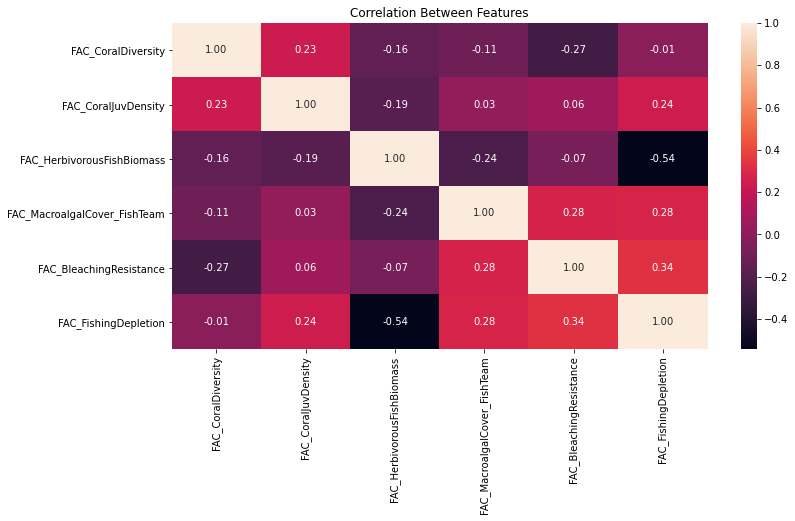

In [7]:
# Check for correlations between features
corr =X.corr()
fig, ax =plt.subplots(figsize =(12,6))
ax  = sns.heatmap(corr,annot =True,fmt = ".2f")
ax.set_title('Correlation Between Features');

### Split Into Train and Test

In [8]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

### AdaBoost Regressor Using Linear Regression As Base

In [9]:
# Instantiate a normalized linear regression model
reg_lm = LinearRegression(normalize=True)

# Build and fit an AdaBoost regressor
reg_ada = AdaBoostRegressor(base_estimator=reg_lm, n_estimators=12, random_state=68)
reg_ada.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = reg_ada.predict(X_test)

# Evaluate the performance using the RMSE
rmse = np.sqrt(MSE(y_test, pred))
print('RMSE: {:.3f}'.format(rmse))

RMSE: 0.126


### AdaBoost Regressor Using Tree As Base

In [10]:
# Build and fit an AdaBoost regressor
reg_ada = AdaBoostRegressor(n_estimators=12, random_state=68)
reg_ada.fit(X_train, y_train)

# Calculate the predictions on the test set
pred = reg_ada.predict(X_test)

# Evaluate performance with MAE
print('MAE: {:.3f}'.format(mean_absolute_error(y_test,pred)))

# Evaluate the performance using the RMSE
rmse = np.sqrt(MSE(y_test, pred))
print('RMSE: {:.3f}'.format(rmse))

MAE: 0.088
RMSE: 0.120


### Stacking Regressor With Mlxtend

In [11]:
# Instantiate first layer regressors
reg_dt = DecisionTreeRegressor(min_samples_leaf=12, min_samples_split=33,
                               random_state=68)
reg_lr = LinearRegression(normalize=True)
reg_ridge = Ridge(random_state=68)

# Instantiate the second layer regressor
reg_meta = LinearRegression()

# Build the stacking regressor
reg_stack = StackingRegressor(regressors=[reg_dt, reg_lr, reg_ridge],
                             meta_regressor=reg_meta)
reg_stack.fit(X_train, y_train)

# Evaluate the performance using MAE and RMSE
pred = reg_stack.predict(X_test)
print('MAE: {:.3f}'.format(mean_absolute_error(y_test,pred)))
rmse = np.sqrt(MSE(y_test, pred))
print('RMSE: {:.3f}'.format(rmse))

MAE: 0.095
RMSE: 0.121


### Fit a XGBoost Tree Model

In [12]:
# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
                  
# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
pred = xg_reg.predict(X_test) 

# Compute the rmse: rmse
rmse=np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse)) 

RMSE :  0.280897


In [13]:
# Convert  dataset into optimized data structure
data_dmatrix = xgb.DMatrix(data=X,label=y)

### Cross Validation

In [14]:
# Create parameter dictionary
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

# Run cross validation
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=500,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=68)

print(cv_results.head())
print('\n Best test round and RMSE: ',(cv_results["test-rmse-mean"]).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         0.397600        0.004764        0.397495       0.011625
1         0.384381        0.004103        0.384283       0.012104
2         0.372470        0.003506        0.372381       0.012526
3         0.361739        0.002967        0.361658       0.012898
4         0.352070        0.002481        0.351999       0.013224

 Best test round and RMSE:  115    0.2637
Name: test-rmse-mean, dtype: float64


### Plotting Feature Importance

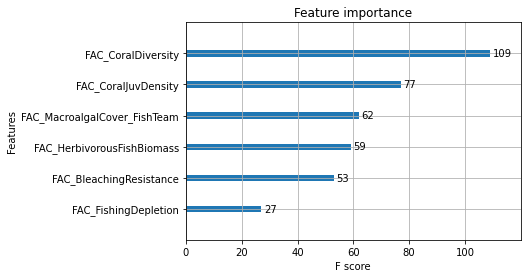

In [15]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix=xgb.DMatrix(X,y)

# Create the parameter dictionary: params
params={"objective":"reg:squarederror", "max_depth":4}

# Train the model: xg_reg
xg_reg=xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=120)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

### Summary Results:
An AdaBoost tree-based regression model had the lowest RMSE at 0.120, with a stacked regressor with a RMSE of 0.121 very close behind. The XGBoost regressor, after cross validation had an RMSE of 0.2637.
Coral diversity was the most important feature, followed by juvenile coral density in predicting the number of diseased colonies of coral per square meter in this data set.